In [1]:
# Imports
import matplotlib.pyplot as plt
import joblib
import shap
SEED=42

# Load Data

In [2]:
# Load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
loaded_joblib = joblib.load("Data/best-models.joblib")
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [3]:
# Save each object from the loaded_joblib dictionary as a separate variable 
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
rf = loaded_joblib['RandomForest']
lin_reg = loaded_joblib["LinearRegression"]

# Create an X_shap and y_shap variable

In [4]:
#Create an X_shap
shap.initjs()
X_shap = shap.sample(X_train_df, nsamples=100, random_state=SEED)
X_shap.head()

,Item_Visibility,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2937,0.039811,191.3188,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6371,0.030414,221.3114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3762,0.000000,37.5822,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
419,0.027139,127.3336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8475,0.080627,92.5436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

2937    2285.0256
6371    2217.1140
3762     196.4110
419     2940.1728
8475     378.1744
          ...    
2076    2516.7240
3986    4250.4672
1267    1884.2140
454     2683.1740
7869    2626.5810
Name: Item_Outlet_Sales, Length: 100, dtype: float64

# Create a SHAP explainer

In [6]:
explainer = shap.Explainer(rf)
explainer

# Calculate the shap values for your model

In [7]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [8]:
# Checking shape of shap_values
shap_values.shape

(100, 39)

# Create a summary plot

## Barplot for Random Forest Regression using SHAP

The figure layout has changed to tight


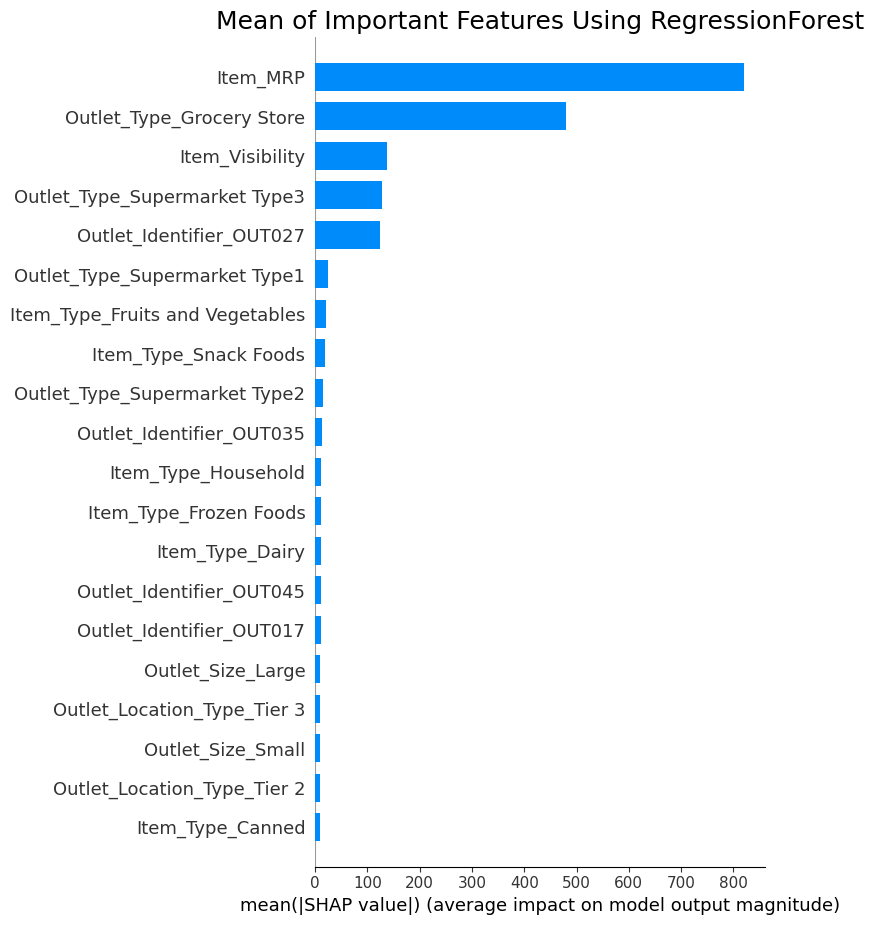

In [20]:
plt.rcParams.update({'font.size': 15})
#Summary plot - with plot_type='bar'
# Create a SHAP summary plot with 'bar' plot_type
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap, plot_type='bar', show=False)

# Set a title for your plot
ax.set_title('Mean of Important Features Using RegressionForest')
plt.tight_layout();

In [21]:
# Saving plot to Images folder
fig.savefig('Images/summary_plot_rf_feature_importance.png', bbox_inches='tight')

## Dot plot RandomForest using SHAP

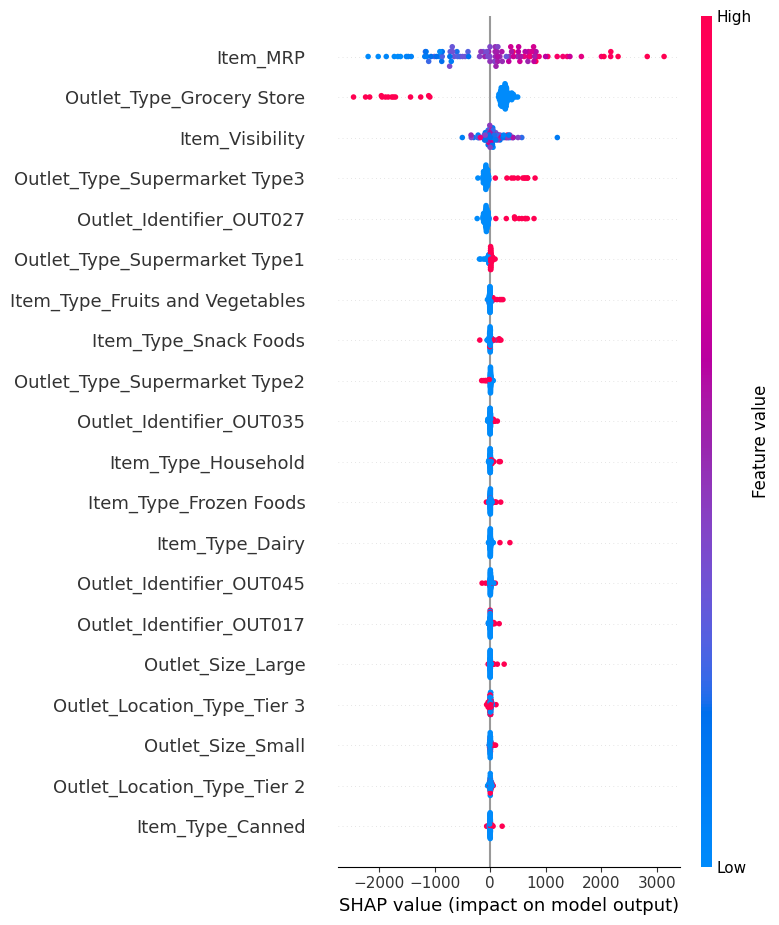

<Figure size 640x480 with 0 Axes>

In [24]:
# summary plot - with plot_type='dot'
shap.summary_plot(shap_values,X_shap)
plt.tight_layout();


In [25]:
# Saving plot to Images folder
fig.savefig('Images/summary_dot_rf_feature_importance.png', bbox_inches='tight')

# Top 3 Important Features Interpreted

1) `Item_MRP`: The presence of red dots signifies a strong positive SHAP value, suggesting that as the Maximum Retail Price (MRP) of an item rises, the RegressionForest model predicts a corresponding increase in outlet sales. In other words, higher prices for items tend to lead to higher sales predictions.

2) `Outlet-Type_Grocery Store`: A notably negative SHAP value for this feature indicates that when products are sold in outlets categorized as "Grocery Store," the model anticipates lower sales. This could be attributed to factors such as a limited product selection or lower customer foot traffic in such stores, both of which negatively impact sales predictions.

3) `Item_Visibility`: This feature has mainly blue values around 0 SHAP value, and a few red dots around on both sides of the SHAP value 0. This suggests that it has a generally low impact on outlet sales. This feature can be explored further to see if it can become influential in specific situations. 